# Challenge 3: Geo-Daten

In dieser Challenge versuchen wir die Standort Daten der Tankstellen zu interpretieren.
Dazu können wir die Bibliothek [GeoPandas](https://geopandas.org/en/stable/) nutzen.

## Importieren der Bibliotheken 
Wir importieren zusätzlich noch die Bibliotheken Matplotlib zur Visualisierung, Shapely und Math für geometrische Berechnungen.

In [2]:
# Pangas zur Daten-Anaylse
import pandas as pd
# GeoPandas für geometrische Funktionen
import geopandas
# Zur Visualisierung
import matplotlib.pyplot as plt
# Für geometrische Berechnungen
from shapely.geometry import Point
import math 


### Aufgabe
Importiere wieder wie bekannt die Stationsdaten!

In [39]:
stationsdaten = pd.read_csv (r'../../daten/2022-06-11-stations.csv')

## Geo Punkte
Mit GeoPandas kann man GeoDatenFrame erzeugen. 

**Beispiel**

geopandas.GeoDataFrame(datenframe, geometry=geopandas.points_from_xy(datenframe.longitude, datenframe.latitude, crs='epsg:4326'))

### Aufgabe

Erzeuge den GeoDatenFrame "geodaten" vom DatenFrame "stationsdaten" und gebe die Kopfdaten aus!

In [46]:
geodaten = geopandas.GeoDataFrame(stationsdaten, geometry=geopandas.points_from_xy(stationsdaten.longitude, stationsdaten.latitude, crs='epsg:4326'))
geodaten.head()

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,geometry
0,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.180700,11.460900,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",POINT (11.46090 48.18070)
1,44e2bdb7-13e3-4156-8576-8326cdd20459,bft Tankstelle,NaN,Schellengasse,53,36304,Alsfeld,50.752009,9.279039,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":63,""period...",POINT (9.27904 50.75201)
2,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53175,Bonn,50.695100,7.142760,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":30,""period...",POINT (7.14276 50.69510)
3,e18286e5-ef00-4b4f-a81d-371b665f265d,AVIA Tankstelle,AVIA,Hohenloher Straße,4,74547,Untermünkheim,49.151580,9.734440,2014-03-18 16:45:31+01,{},POINT (9.73444 49.15158)
4,e17ed0cd-65fc-48fa-9f25-45d6a1b928f2,Tankstelle Kirchlengern,Hempelmann,Hüllerstraße,20,32278,Kirchlengern,52.217400,8.638160,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":63,""period...",POINT (8.63816 52.21740)


## Visualisieren
Mit Matplotlib kann man schnelle sehr simple Visualisirerungen vornehmen um Daten zu prüfen.
Hier ist ein Beispiel, das alle Tankstellen in Berlin anzeigt.

### Aufgabe 

Ändere das Beispiel so ab, dass Tankstellen aus Hamburg und München auf der Karte in Pink angezeigt werden!

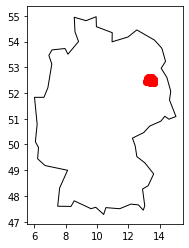

In [72]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.iso_a3 == 'DEU'].plot(color='white', edgecolor='black')

geodaten[geodaten.city == 'Berlin'].plot(ax=ax, color='red')

plt.show()

## Entfernungen berechnen

Die Berechnung von Entfernungen ist relativ komplex. Die Erde ist nicht flach, sondern gekrümmt. 
Deshalb gibt es verschiedene Algorythmen um die Krümmung mit einzubeziehen.
Es gibt zudem unzählige Koordinatensysteme.

GPS Systeme nutzen z.B. das System EPSG 4326. In diesem Koordinatensystem werden Punkte mittels Longitue und Latiude angegeben.
Beim Erzeugen unser Geodaten, haben wir genau dieses angegeben.

Wenn wir in diesem System versuchen Entfernungen zu brechnen werden wir Ergebnisse in Grad erhalten. Wir möchten aber in Metern rechnen, da dies für uns Menschen intuitiver ist.
Damit wir das errechnen können, müssen wir das Koordinatensystem transformieren und in ein passendes System umwandeln.

Wir können z.B. das System [EPSG 31469](https://epsg.io/31469) nutzen. Dieses System funktioniert perfekt für die meisten Bereiche in Deutschland. Für die Grenze zu Polen, wäre es etwa nicht präzisie.


Wir wandelt im Beispiel den Standort der MCS um.
**Beispiel**

mcs = geopandas.GeoDataFrame(geometry=[Point(9.997462, 53.6761905)], crs='epsg:4326')
mcs = mcs.to_crs('EPSG:31469')

### Aufgabe
Ergänze den Code so, dass die geodaten umgewandelt und in der Variabel "umgewandelt" gespeichert werden!

In [75]:
mcs = geopandas.GeoDataFrame(geometry=[Point(9.997462, 53.6761905)], crs='epsg:4326')
mcs = mcs.to_crs('EPSG:31469')
umgewandelt = geodaten.to_crs('EPSG:31469')

Mit der Funktion Distance können wir jetzt Entfernungen berechnen.

Hier berechnen wir die Entfernung zu MCS. Die Funktion Floor sorgt dafür, dass wir nur Meter erhalten. 
Geopandas kann sogar Millimeter genau rechnen.

**Beispiel**
dataframe.geometry.apply(lambda g: math.floor(mcs.distance(g)))

### Aufgabe
Berechne für den GeoDatenFrame "umgewandelt" die Entfernungen zur MCS!
Speichere dies in der Spalte "entfernung" des GeoDatenFrame!



In [76]:
umgewandelt['entfernung'] = umgewandelt.geometry.apply(lambda g: math.floor(mcs.distance(g)))


### Aufgabe
Sortiere diesen DatenFrame und gebe die ersten 3 Standorte aus!

In [78]:
entfernung_zu_mcs = umgewandelt.sort_values(by=['entfernung'])
entfernung_zu_mcs.head(3)

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,geometry,entfernung
5105,bdc672c7-5a83-4ab3-ad61-992e8c84ecfd,Shell Norderstedt Ohechaussee 117,Shell,Ohechaussee,117,22848,Norderstedt,53.674394,9.987061,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",POINT (5168972.205 5960912.119),716
1887,ea7587b9-0c95-4836-a230-e10f96b047eb,Esso Tankstelle,ESSO,OCHSENZOLLER STR. 131,,22848,NORDERSTEDT,53.681803,9.985981,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period...",POINT (5168959.126 5961740.820),984
12745,667c3279-eac0-4c89-a0c4-0a705312a070,Aral Tankstelle,ARAL,Ohechaussee,146,22848,Norderstedt,53.671993,9.983360,2014-03-18 16:45:31+01,{},POINT (5168709.029 5960662.498),1043
